In [22]:
"""
------------------------------------------------------------------------------
About
In this data analysis, the mean of NO2 and PM2.5 (µg/m³) is calculated for 
each admin area. 
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nAbout\nIn this data analysis, the mean of NO2 is calculated for each\nadmin area. \n------------------------------------------------------------------------------\n'

In [23]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point


In [24]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

airquality = pd.read_csv("../data/raw/2023_pollutant_grid_avg.csv")

In [25]:
airquality.head(20)

,x,y,no2,pm10,pm2.5
0,410975,5807975,10,14,10
1,396325,5826225,10,15,10
2,410275,5809375,8,13,9
3,380625,5829025,11,14,10
4,396575,5823325,17,17,12
5,377125,5813225,9,13,9
6,380275,5815425,10,14,9
7,379025,5814475,10,14,9
8,376375,5816375,13,15,10
9,407725,5814575,10,14,10


In [26]:
airquality = pd.DataFrame(airquality)

#GeoDataFrame
geometry = [Point(xy) for xy in zip(airquality["x"], airquality["y"])]
#print(geometry)
df_Airquality = gpd.GeoDataFrame(airquality, geometry=geometry)

In [27]:
# set correct EPSG
df_Airquality.set_crs(epsg=25833, inplace=True)

print(df_Airquality.crs)

EPSG:25833


In [28]:

#Convert to EPSG:4326
df_Airquality = df_Airquality.to_crs("EPSG:4326")

df_Airquality.head()

,x,y,no2,pm10,pm2.5,geometry
0,410975,5807975,10,14,10,POINT (13.69106 52.41475)
1,396325,5826225,10,15,10,POINT (13.47005 52.57618)
2,410275,5809375,8,13,9,POINT (13.68039 52.42721)
3,380625,5829025,11,14,10,POINT (13.23746 52.59812)
4,396575,5823325,17,17,12,POINT (13.47464 52.55016)


In [29]:
"""
------------------------------------------------------------------------------
CSR (coordinate reference system)
------------------------------------------------------------------------------
"""

#Check CRS
print(admin_areas.crs)
print(df_Airquality.crs)

EPSG:4326
EPSG:4326


In [30]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != df_Airquality.crs:
    df_Airquality = df_Airquality.to_crs(admin_areas.crs)

In [31]:
"""
------------------------------------------------------------------------------
Checking invalid geometries
------------------------------------------------------------------------------
"""

#Check the combined dataframe for empty or invalid geometries
print(f"Empty geometry in df_Airquality: {len(df_Airquality[df_Airquality.is_empty])}")
print(f"Invalid in df_Airquality: {len(df_Airquality[~df_Airquality.is_valid])}")

Empty geometry in df_Airquality: 0
Invalid in df_Airquality: 0


In [32]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

df_Airquality.shape

(360765, 6)

In [33]:
df_Airquality.isna().sum()

x           0
y           0
no2         0
pm10        0
pm2.5       0
geometry    0
dtype: int64

In [34]:
df_Airquality.dtypes

x              int64
y              int64
no2            int64
pm10           int64
pm2.5          int64
geometry    geometry
dtype: object

<Axes: >

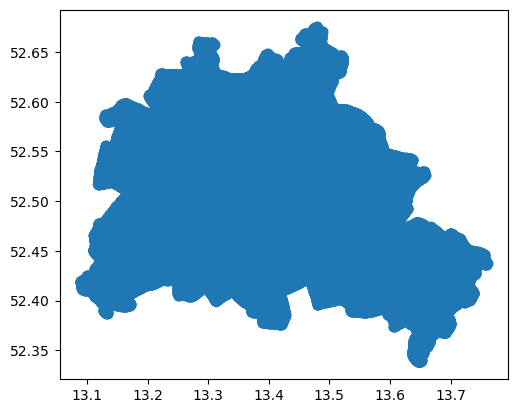

In [35]:
df_Airquality.plot()

In [36]:
"""
------------------------------------------------------------------------------
Function
airquality by admin area
Mean no2
------------------------------------------------------------------------------
"""

#NO2
def calculate_mean_no2(admin_area, df_Airquality):
    #find intersections between the airquality dataframe and admin areas
    intersections = df_Airquality[df_Airquality.intersects(admin_area.geometry)]  
    
    #Mean no2
    Mean_no2 = intersections["no2"].mean().round(2)

    print(f"Admin Area: {admin_area["pgr_name"]}, Mean_no2 : {Mean_no2}")
    
    return  Mean_no2


#PM2.5
def calculate_mean_pm25(admin_area, df_Airquality):
    #find intersections between the airquality dataframe and admin areas
    intersections = df_Airquality[df_Airquality.intersects(admin_area.geometry)]  
    
    #Mean pm25
    Mean_pm25 = intersections["pm2.5"].mean().round(2)

    print(f"Admin Area: {admin_area["pgr_name"]}, Mean_pm25 : {Mean_pm25}")
    
    return   Mean_pm25

In [37]:
# Test for one admin area
intersections = df_Airquality[df_Airquality.intersects(admin_areas.iloc[0].geometry)]
Mean_no2 = intersections["no2"].mean().round(2)
Mean_no2

18.48

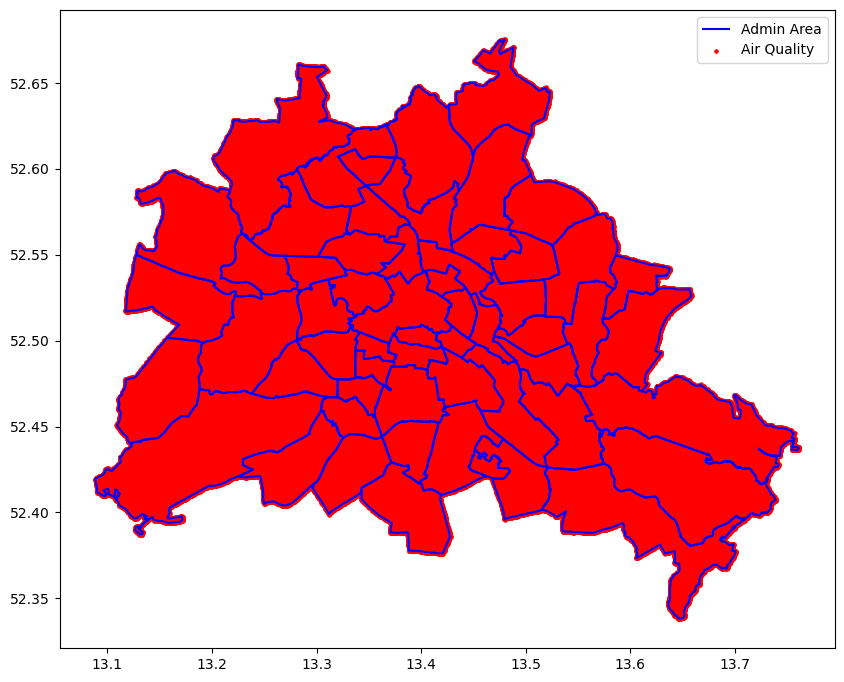

In [38]:
# Test plot
fig, ax = plt.subplots(figsize=(10,10))
admin_areas.boundary.plot(ax=ax, color="blue", label="Admin Area")
df_Airquality.plot(ax=ax, color="red", markersize=5, label="Air Quality")
plt.legend()
plt.show()

In [39]:
#Calculation of mean no2 for each administrative area
admin_areas["Mean_no2"] = admin_areas.apply(
    lambda row: calculate_mean_no2(row, df_Airquality), axis=1
)


Admin Area: Südlicher Prenzlauer Berg, Mean_no2 : 18.48
Admin Area: Kreuzberg Süd, Mean_no2 : 17.45
Admin Area: Marienfelde / Lichtenrade, Mean_no2 : 13.23
Admin Area: Wilhelmstadt / Staaken, Mean_no2 : 12.32
Admin Area: Nördliches Weißensee, Mean_no2 : 12.57
Admin Area: Tempelhof, Mean_no2 : 17.81
Admin Area: Lichtenberg Nord, Mean_no2 : 16.09
Admin Area: Lichtenberg Mitte, Mean_no2 : 14.99
Admin Area: Hellersdorf, Mean_no2 : 13.42
Admin Area: Buch, Mean_no2 : 11.37
Admin Area: Hohenschönhausen Nord, Mean_no2 : 12.12
Admin Area: Kaulsdorf/Mahlsdorf, Mean_no2 : 12.31
Admin Area: Treptow-Köpenick 1, Mean_no2 : 15.83
Admin Area: Tegel, Mean_no2 : 13.73
Admin Area: Mariendorf, Mean_no2 : 14.3
Admin Area: Friedrichshain Ost, Mean_no2 : 16.57
Admin Area: Nördlicher Prenzlauer Berg, Mean_no2 : 17.32
Admin Area: Charlottenburg Nord, Mean_no2 : 16.5
Admin Area: Lankwitz/Lichterfelde Ost, Mean_no2 : 13.51
Admin Area: Schöneberg Nord, Mean_no2 : 17.02
Admin Area: Neukölln, Mean_no2 : 18.37
Admin

In [40]:
#Calculation of mean pm2.5 for each administrative area
admin_areas["Mean_pm25"] = admin_areas.apply(
    lambda row: calculate_mean_pm25(row, df_Airquality), axis=1
)

Admin Area: Südlicher Prenzlauer Berg, Mean_pm25 : 11.45
Admin Area: Kreuzberg Süd, Mean_pm25 : 11.13
Admin Area: Marienfelde / Lichtenrade, Mean_pm25 : 10.71
Admin Area: Wilhelmstadt / Staaken, Mean_pm25 : 10.44
Admin Area: Nördliches Weißensee, Mean_pm25 : 10.77
Admin Area: Tempelhof, Mean_pm25 : 10.71
Admin Area: Lichtenberg Nord, Mean_pm25 : 11.16
Admin Area: Lichtenberg Mitte, Mean_pm25 : 11.26
Admin Area: Hellersdorf, Mean_pm25 : 11.07
Admin Area: Buch, Mean_pm25 : 9.95
Admin Area: Hohenschönhausen Nord, Mean_pm25 : 10.85
Admin Area: Kaulsdorf/Mahlsdorf, Mean_pm25 : 11.0
Admin Area: Treptow-Köpenick 1, Mean_pm25 : 10.81
Admin Area: Tegel, Mean_pm25 : 10.43
Admin Area: Mariendorf, Mean_pm25 : 10.98
Admin Area: Friedrichshain Ost, Mean_pm25 : 11.41
Admin Area: Nördlicher Prenzlauer Berg, Mean_pm25 : 11.36
Admin Area: Charlottenburg Nord, Mean_pm25 : 10.59
Admin Area: Lankwitz/Lichterfelde Ost, Mean_pm25 : 10.75
Admin Area: Schöneberg Nord, Mean_pm25 : 11.41
Admin Area: Neukölln, Me

In [41]:
#Data frame
df_Airquality_no2 = admin_areas[["pgr_id", "pgr_name", "Mean_no2", "Mean_pm25"]]
#sort values descending
df_Airquality_no2.sort_values(by="Mean_pm25", ascending=False, inplace=True)
df_Airquality_no2.reset_index(drop=True, inplace=True)


df_Airquality_no2.head(20)

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_22849/442935361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Airquality_no2.sort_values(by="Mean_pm25", ascending=False, inplace=True)


,pgr_id,pgr_name,Mean_no2,Mean_pm25
0,0830,Gropiusstadt,14.61,11.54
1,0370,Südlicher Prenzlauer Berg,18.48,11.45
2,0250,Friedrichshain Ost,16.57,11.41
3,0710,Schöneberg Nord,17.02,11.41
4,0340,Südliches Pankow,15.24,11.40
5,0210,Kreuzberg Nord,17.69,11.37
6,0130,Gesundbrunnen,16.96,11.36
7,0360,Nördlicher Prenzlauer Berg,17.32,11.36
8,0240,Friedrichshain West,18.98,11.35
9,0450,Wilmersdorf Zentrum,18.35,11.27


In [45]:
#Min max
df_Airquality_no2["Mean_no2"].min()

10.11

In [46]:
df_Airquality_no2["Mean_no2"].max()

18.98

In [47]:
df_Airquality_no2["Mean_pm25"].min()

9.61

In [48]:
df_Airquality_no2["Mean_pm25"].max()

11.54

In [49]:
#CSV
df_Airquality_no2.to_csv("../data/csv/airqualityNo2.csv", index=False)